# CASE STUDY: IRIS PLANT CLASSIFICATION USING K-NEAREST NEIGHBORS





# STEP #0: PROBLEM STATEMENT

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. The attribute to be predicted is the class of iris plant. The classes are as follows: 1. Iris Setosa, 2. Iris Versicolour, 3. Iris Virginica

There are 4 features:
1. sepalLength: sepal length in cm
2. sepalWidth: sepal width in cm
3. petalLength: petal length in cm
4. petalWidth: petal width in cm

There are 3 classes represneting class label of iris flower {1,2,3}
1. Iris Setosa
2. Iris Versicolour
3. Iris Virginica




# STEP #1: IMPORTING DATA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Iris.csv")


# STEP #2: EXPLORING THE DATASET  

In [2]:
# Let's view the head of the training dataset
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Let's view the last elements in the training dataset
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


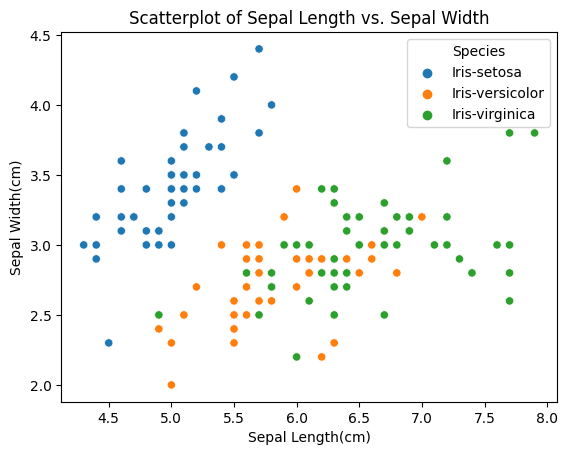

In [4]:
# Create a scatterplot
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species')

# Add labels and a legend
plt.xlabel('Sepal Length(cm)')
plt.ylabel('Sepal Width(cm)')
plt.title('Scatterplot of Sepal Length vs. Sepal Width')
plt.legend(title='Species')

plt.show()

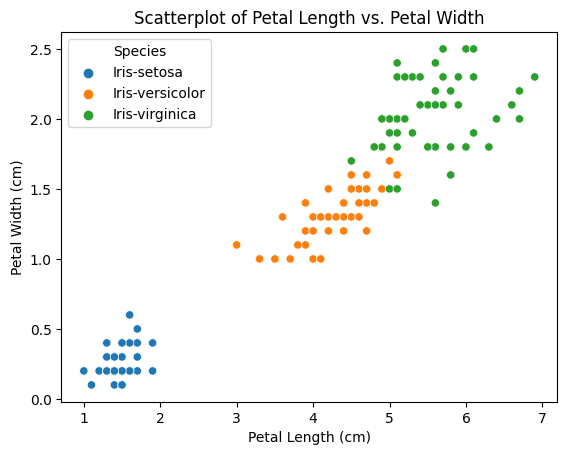

In [5]:
# Create a scatterplot with petal features
sns.scatterplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species')

# Add labels and a legend
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Scatterplot of Petal Length vs. Petal Width')
plt.legend(title='Species')

plt.show()

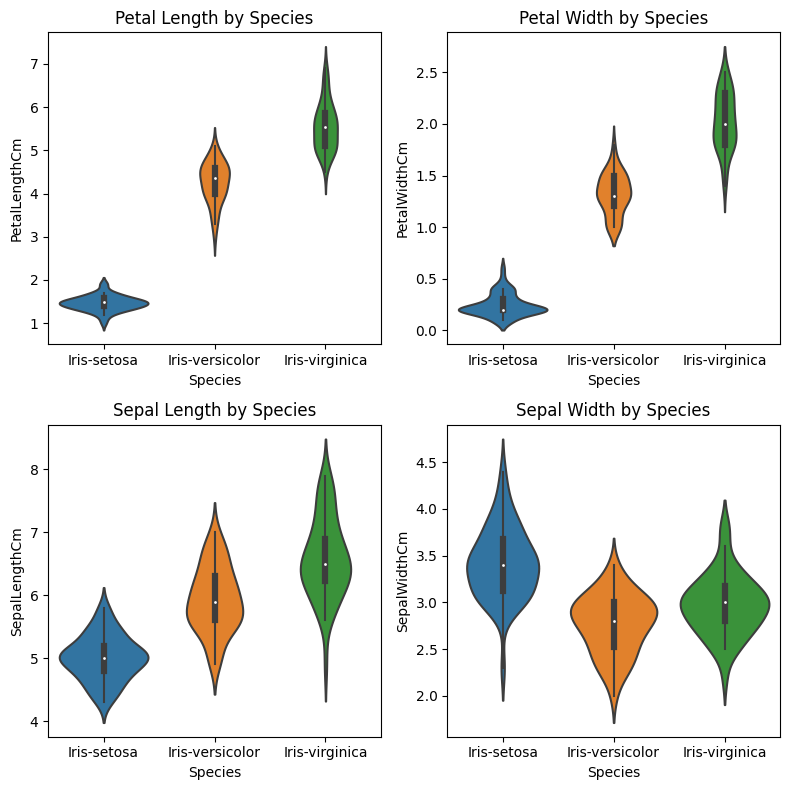

In [6]:
# Let's show the Violin plot

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# Create violin plots for each feature
sns.violinplot(x='Species', y='PetalLengthCm', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Petal Length by Species')

sns.violinplot(x='Species', y='PetalWidthCm', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Petal Width by Species')

sns.violinplot(x='Species', y='SepalLengthCm', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Sepal Length by Species')

sns.violinplot(x='Species', y='SepalWidthCm', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Sepal Width by Species')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


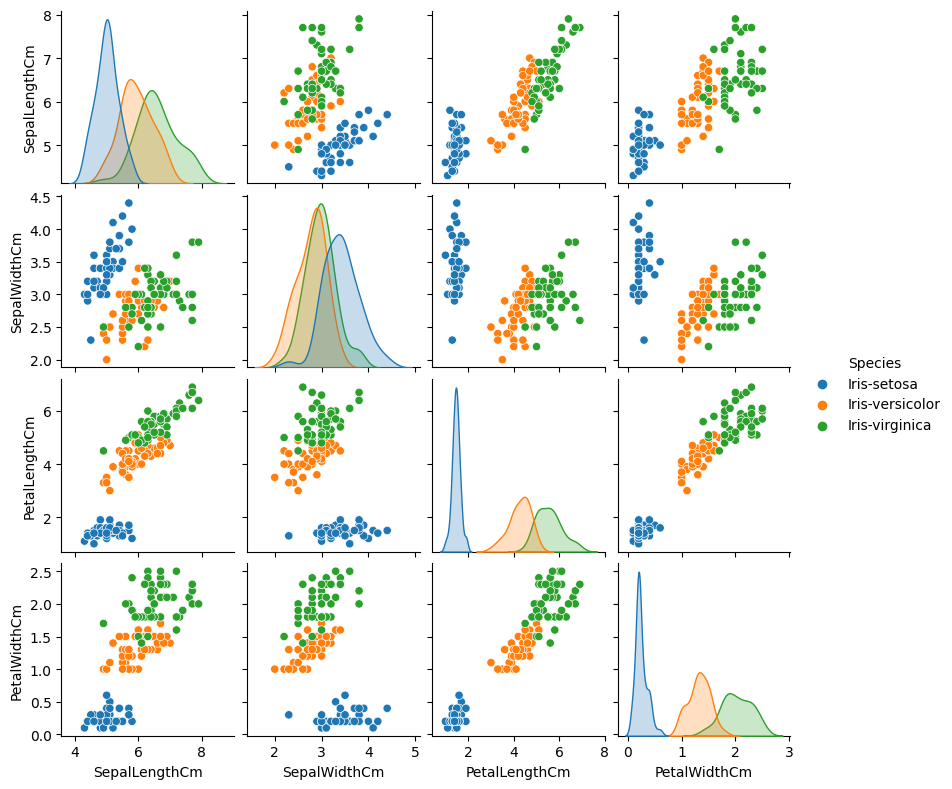

In [7]:
# Let's try the Seaborn pairplot
sns.pairplot(data=df, hue='Species', height=2)

<ipython-input-8-2a55546ab07a>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


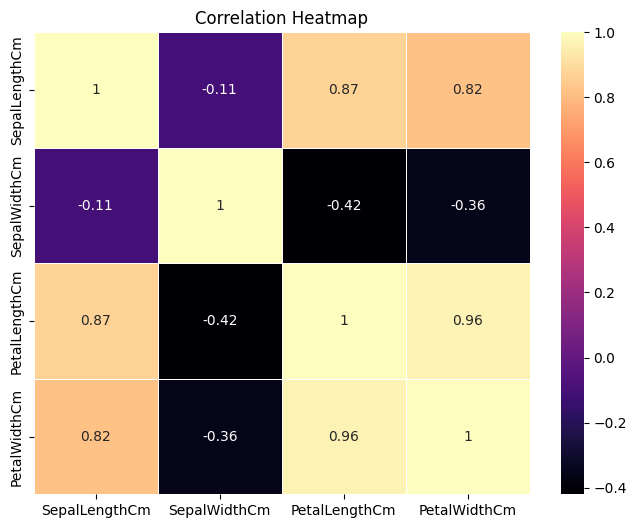

In [8]:
# Let's check the correlation between the variables

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# STEP #3: DATA CLEANING

In [9]:
# Let's drop the ID and Species (target label) coloumns
df = pd.read_csv("Iris.csv")
X = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = df["Species"]

In [10]:
X


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [12]:
# Import train_test_split from scikit library
from sklearn.model_selection import train_test_split

# We perform a train-test split (65% training, 35% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=123)

# Verify the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (97, 4)
X_test shape: (53, 4)
y_train shape: (97,)
y_test shape: (53,)


In [13]:
X_train.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
86,6.7,3.1,4.7,1.5
91,6.1,3.0,4.6,1.4
89,5.5,2.5,4.0,1.3
79,5.7,2.6,3.5,1.0
101,5.8,2.7,5.1,1.9


In [14]:
y_train

86     Iris-versicolor
91     Iris-versicolor
89     Iris-versicolor
79     Iris-versicolor
101     Iris-virginica
            ...       
17         Iris-setosa
98     Iris-versicolor
66     Iris-versicolor
126     Iris-virginica
109     Iris-virginica
Name: Species, Length: 97, dtype: object

# STEP #4: TRAINING THE MODEL

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
# Fitting K-NN to the Training set

knn_model = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

print(knn_model)

KNeighborsClassifier(n_jobs=1)


In [17]:
# Fit the K-NN model to the training data
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=1)

# STEP #5: EVALUATING THE MODEL

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Make predictions on the test data
y_pred = knn_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report with precision, recall, and F1-score
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Calculate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Accuracy: 0.9811320754716981
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        22
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.95      1.00      0.98        20

       accuracy                           0.98        53
      macro avg       0.98      0.97      0.98        53
   weighted avg       0.98      0.98      0.98        53

Confusion Matrix:
 [[22  0  0]
 [ 0 10  1]
 [ 0  0 20]]


<Axes: >

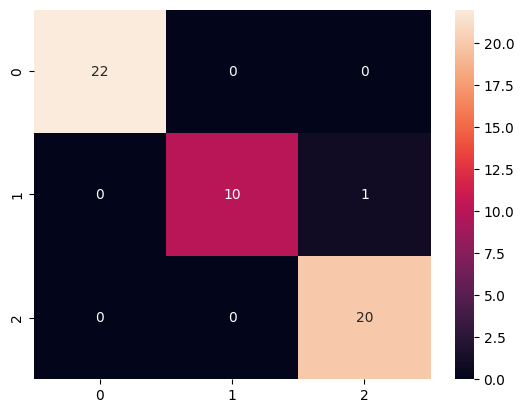

In [19]:
sns.heatmap(cm, annot = True)

In [20]:
import pickle

filename = 'FrancoBraconi_trained_IRIS_classification_model.sav'
pickle.dump(knn_model,open(filename,'wb'))